In [ ]:
# Cell 1: Install and import required libraries
!pip install nltk
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional

# Download NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# ✅ 1. Imports
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# NLTK setup
nltk.download('stopwords')

# ✅ 2. Load Data
columns = ["sentiment", "id", "date", "query", "user", "text"]
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', names=columns)

# ✅ 3. Keep only 'sentiment' and 'text' columns
df = df[["sentiment", "text"]]

# ✅ 4. Map sentiment to binary: 0 (negative), 4 (positive)
df = df[df["sentiment"].isin([0, 4])]
df["sentiment"] = df["sentiment"].map({0: 0, 4: 1})

# ✅ 5. Preprocessing function — as you originally wrote
def preprocess_text(text_series):
    corpus = []
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')  # 'not' is useful for sentiment

    for text in text_series:
        review = re.sub('[^a-zA-Z]', ' ', str(text))  # Remove non-letters
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(all_stopwords)]
        review = ' '.join(review)
        corpus.append(review)

    return corpus

# ✅ 6. Apply preprocessing CORRECTLY (on full Series)
print("Preprocessing training data...")
df["clean_text"] = preprocess_text(df["text"])

# ✅ 7. Preview
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing training data...


,sentiment,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass not behav mad see


In [ ]:
# ✅ 7. Save to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

save_path = "/content/drive/MyDrive/cleaned_twitter_sentiment.csv"
df.to_csv(save_path, index=False)
print(f"\n✅ Cleaned dataset saved to: {save_path}")

Mounted at /content/drive

✅ Cleaned dataset saved to: /content/drive/MyDrive/cleaned_twitter_sentiment.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import pandas
import pandas as pd

# Step 3: Define the file path (adjust if it's in a subfolder)
file_path = "/content/drive/MyDrive/clean_twitter_sentiment.csv"

# Step 4: Load the CSV into a DataFrame
try:
    df = pd.read_csv(file_path)
    print("✅ File loaded successfully.\n")
    print(df.head())  # Show the first 5 rows
except FileNotFoundError:
    print("❌ File not found. Please check the file path and ensure it's saved in your Google Drive.")
except Exception as e:
    print(f"❌ An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File loaded successfully.

   sentiment                                               text  \
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1          0  is upset that he can't update his Facebook by ...   
2          0  @Kenichan I dived many times for the ball. Man...   
3          0    my whole body feels itchy and like its on fire    
4          0  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0  switchfoot http twitpic com zl awww bummer sho...  
1  upset updat facebook text might cri result sch...  
2  kenichan dive mani time ball manag save rest g...  
3                    whole bodi feel itchi like fire  
4                  nationwideclass not behav mad see  


In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split: maintain label balance
train_df, test_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df['sentiment'],
    random_state=42
)


In [ ]:
# ✅ 7. Tokenization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Make sure NLTK stopwords are downloaded
nltk.download('stopwords')

# Parameters
MAX_WORDS = 10000
MAX_LEN = 100
text_col = "clean_text"   # 👈 make sure this column exists in both train_df and test_df
label_col = "sentiment"

# ✅ Clean the text columns: fill NaNs and convert to string
train_df[text_col] = train_df[text_col].fillna("").astype(str)
test_df[text_col] = test_df[text_col].fillna("").astype(str)

# ✅ Create and fit tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df[text_col])

# ✅ Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_df[text_col])
X_test = tokenizer.texts_to_sequences(test_df[text_col])

# ✅ Pad sequences to equal length
X_train = pad_sequences(X_train, maxlen=MAX_LEN)
X_test = pad_sequences(X_test, maxlen=MAX_LEN)

# ✅ Extract labels
y_train = train_df[label_col].values
y_test = test_df[label_col].values

# ✅ Save tokenizer to Google Drive
tokenizer_path = '/content/drive/MyDrive/tokenizer.pkl'
with open(tokenizer_path, 'wb') as f:
    pickle.dump(tokenizer, f)

print(f"✅ Tokenizer saved to: {tokenizer_path}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Tokenizer saved to: /content/drive/MyDrive/tokenizer.pkl


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# ✅ One-hot encode labels
y_train = to_categorical(train_df[label_col].values, num_classes=2)
y_test = to_categorical(test_df[label_col].values, num_classes=2)
# Model parameters
vocab_size = 10000
embedding_dim = 64
input_length = MAX_LEN
lstm_units = 64
num_filters = 128
kernel_size = 5
dropout_rate = 0.5

# Build model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    LSTM(lstm_units, return_sequences=True),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(dropout_rate),
    Dense(64, activation='relu'),
    Dropout(dropout_rate),
    Dense(2, activation='softmax')
])

model.build(input_shape=(None, input_length))
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# ✅ Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128
)

# ✅ Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,498 (2.76 MB)

 Trainable params: 722,498 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 114s 12ms/step - accuracy: 0.7477 - loss: 0.5065 - val_accuracy: 0.7866 - val_loss: 0.4531
Epoch 2/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 137s 12ms/step - accuracy: 0.7914 - loss: 0.4487 - val_accuracy: 0.7895 - val_loss: 0.4460
Epoch 3/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 107s 12ms/step - accuracy: 0.8002 - loss: 0.4317 - val_accuracy: 0.7925 - val_loss: 0.4413
Epoch 4/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 143s 12ms/step - accuracy: 0.8083 - loss: 0.4173 - val_accuracy: 0.7914 - val_loss: 0.4414
Epoch 5/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 141s 12ms/step - accuracy: 0.8158 - loss: 0.4037 - val_accuracy: 0.7926 - val_loss: 0.4426
Epoch 6/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - accuracy: 0.8219 - loss: 0.3904 - val_accuracy: 0.7925 - val_loss: 0.4563
Epoch 7/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 106s 12ms/step - accuracy: 0.8282 - loss: 0.3780 - val_accuracy: 0.7896 - val_loss: 0.4607
Epoch 8/10
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 144s 12ms/step - accuracy: 

In [ ]:
# 💾 Save the model
from google.colab import drive
drive.mount('/content/drive')  # run this now
model.save('/content/drive/MyDrive/lstm_cnn_sentiment_model.h5')
print("Model saved as lstm_rnn_sentiment2_model.h5")
import pickle

# After training
with open('/content/drive/MyDrive/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved as lstm_rnn_sentiment2_model.h5


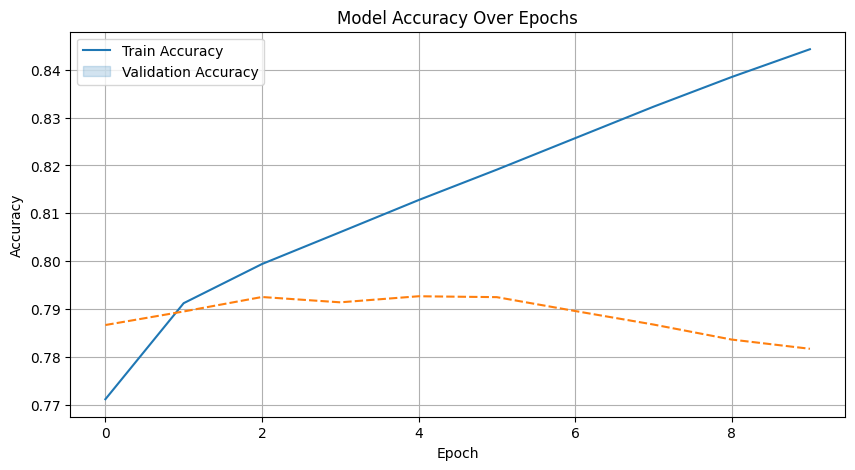

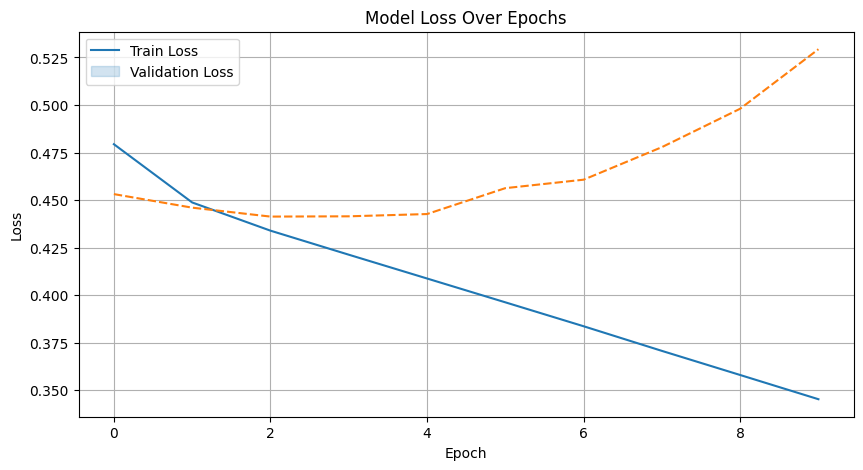

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot accuracy
plt.figure(figsize=(10, 5))
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
plt.show()


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step


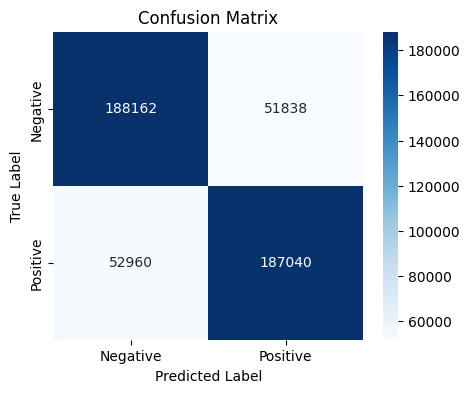

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded y_test to class labels (0 or 1)
y_test_labels = np.argmax(y_test, axis=1)

# Predict class probabilities and convert to class labels
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_classes)

# Plot confusion matrix with seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


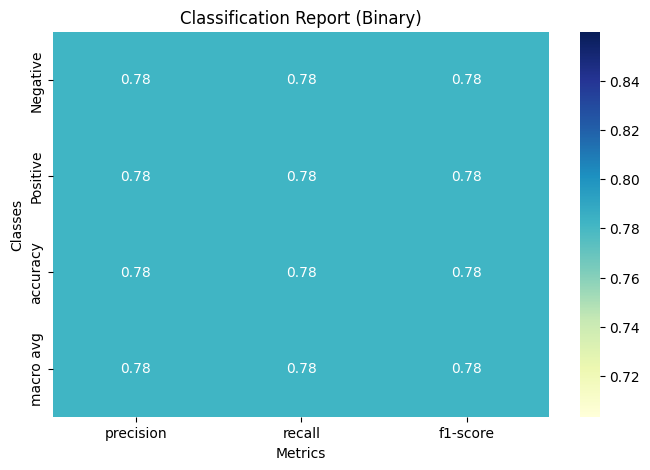

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Step 1: Get binary predictions (assuming sigmoid activation in final layer)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Step 2: Convert y_test to 1D if it's one-hot or 2D
if y_test.ndim > 1:
    y_true = y_test.flatten()
else:
    y_true = y_test

# Step 3: Generate classification report
report_dict = classification_report(
    y_true,
    y_pred,
    target_names=["Negative", "Positive"],
    output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()

# Step 4: Plot classification report as heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report (Binary)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()
